In [39]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder # Nominal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
df = pd.read_csv("clean_data.csv")

SyntaxError: invalid syntax (2736414654.py, line 1)

In [42]:
x = df.drop(labels=["Time_taken (min)"],axis=1)
y = df[["Time_taken (min)"]]

In [43]:
y

,Time_taken (min)
0,46
1,23
2,21
3,20
4,41
...,...
45579,32
45580,36
45581,16
45582,26


In [44]:
x.head()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
0,0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,21.0,55.0,22.0,10.0
1,1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,14.0,55.0,15.0,5.0
2,2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,17.0,30.0,17.0,40.0
3,3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,9.0,20.0,9.0,30.0
4,4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,19.0,50.0,20.0,5.0


In [45]:
df["City"].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [46]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [47]:
Traffic_categories = ["Low","Medium","High","Jam"]
weather_categories = ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny']
vehicle_categories = ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Festival_categories = ['No', 'Yes']
City_categories = ['Metropolitian', 'Urban', 'Semi-Urban']

In [48]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

## Categorical Pipeline
ohe_transformer = OneHotEncoder()
    
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('OneHotEncoder',ohe_transformer,categorical_cols)
])

In [49]:
categorical_cols

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [51]:
x_train

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
5755,5755,36.0,4.1,22.310329,73.169083,22.380329,73.239083,Sandstorms,Jam,0,motorcycle,0.0,No,Metropolitian,21.0,40.0,21.000,50.0
9163,9163,29.0,3.6,22.310526,73.170937,22.370526,73.230937,Sunny,Jam,0,motorcycle,3.0,Yes,Urban,21.0,10.0,21.000,15.0
16410,16410,31.0,4.8,26.473698,80.352677,26.493698,80.372677,Windy,Low,2,scooter,1.0,No,Metropolitian,10.0,45.0,10.000,55.0
36945,36945,33.0,4.2,15.157944,73.950889,15.287944,74.080889,Windy,Jam,2,scooter,1.0,No,Metropolitian,19.0,15.0,19.000,30.0
14679,14679,34.0,4.1,19.126630,72.829976,19.146630,72.849976,Windy,Low,0,motorcycle,1.0,No,Urban,8.0,45.0,0.375,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,37.0,4.9,26.474986,80.342796,26.494986,80.362796,Sunny,Low,1,motorcycle,0.0,No,Urban,8.0,25.0,8.000,35.0
33268,33268,28.0,4.9,17.431477,78.400350,17.481477,78.450350,Fog,Medium,2,motorcycle,0.0,No,Metropolitian,17.0,40.0,17.000,45.0
44845,44845,20.0,4.7,22.514585,88.393310,22.594585,88.473310,Fog,Low,2,scooter,1.0,No,Metropolitian,22.0,20.0,22.000,25.0
4517,4517,34.0,4.6,12.970324,77.645748,12.990324,77.665748,Cloudy,Low,1,motorcycle,1.0,No,Metropolitian,8.0,55.0,9.000,10.0


In [52]:
X_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [53]:
X_train

,num_pipeline__Unnamed: 0,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Restaurant_latitude,num_pipeline__Restaurant_longitude,num_pipeline__Delivery_location_latitude,num_pipeline__Delivery_location_longitude,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__Time_order_hour,...,OneHotEncoder__Road_traffic_density_Medium,OneHotEncoder__Type_of_vehicle_bicycle,OneHotEncoder__Type_of_vehicle_electric_scooter,OneHotEncoder__Type_of_vehicle_motorcycle,OneHotEncoder__Type_of_vehicle_scooter,OneHotEncoder__Festival_No,OneHotEncoder__Festival_Yes,OneHotEncoder__City_Metropolitian,OneHotEncoder__City_Semi-Urban,OneHotEncoder__City_Urban
0,-1.293428,1.124025,-1.623440,0.647373,0.131167,0.669961,0.116679,-1.223528,-1.318236,0.771107,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.035034,-0.106505,-3.143059,0.647397,0.131248,0.668629,0.116295,-1.223528,3.943714,0.771107,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.485569,0.245075,0.504025,1.156141,0.443938,1.228657,0.452410,1.160323,0.435747,-0.945003,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.071388,0.596655,-1.319517,-0.226656,0.165206,-0.293358,0.156297,1.160323,0.435747,0.459087,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,-0.616813,0.772445,-1.623440,0.258322,0.116402,0.230746,0.098366,-1.223528,0.435747,-1.257023,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31903,-1.660092,1.299815,0.807948,1.156298,0.443508,1.228832,0.451945,-0.031602,-1.318236,-1.257023,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
31904,0.792599,-0.282295,0.807948,0.051172,0.358934,0.004577,0.361939,1.160323,-1.318236,0.147067,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
31905,1.670364,-1.688616,0.200101,0.672333,0.794024,0.699062,0.833653,1.160323,0.435747,0.927117,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
31906,-1.387293,0.772445,-0.103822,-0.493985,0.326079,-0.605431,0.325013,-0.031602,0.435747,-1.257023,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [58]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,  rmse, r2_square

In [59]:
models = {
    "Linear_Regression":LinearRegression(),
    "Lasso":Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
    
}

trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


Linear_Regression
Model Training Performance
RMSE: 6.28950483695738
MAE: 4.966107050199212
R2 score 54.26566907473101


Lasso
Model Training Performance
RMSE: 7.4703131787229005
MAE: 5.91217746767673
R2 score 35.48108767403756


Ridge
Model Training Performance
RMSE: 6.289521151509506
MAE: 4.966136291954017
R2 score 54.26543181087228


Elasticnet
Model Training Performance
RMSE: 7.571946280137062
MAE: 6.032054482116377
R2 score 33.71359479391957




### Result

In [61]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
0,Linear_Regression,0.542657
2,Ridge,0.542654
1,Lasso,0.354811
3,Elasticnet,0.337136


### Linear Regression

In [62]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %2f"%score)

Accuracy of the model is 54.265669


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plot y_test and y_pred

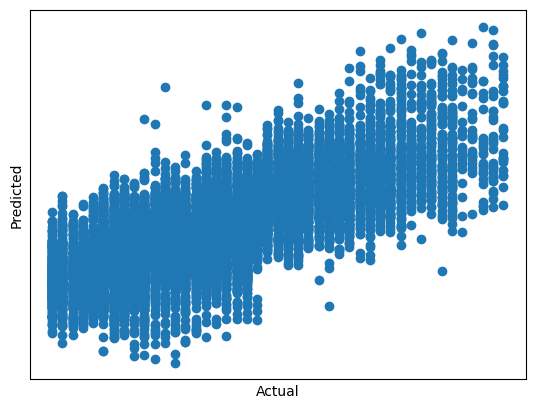

In [130]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.xticks(())
plt.yticks(())

plt.show()


{'Actual':        Time_taken (min)
 10074                30
 12570                28
 34085                20
 30952                16
 15574                38
 ...                 ...
 37781                42
 32405                19
 886                  19
 21049                17
 29927                15
 
 [13676 rows x 1 columns]}